Importação dos dados

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv')

Verificando os valores nulos

In [59]:
missing = data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Verificando os dados do topo do .CSV

In [60]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Transformando os valores nulos em, "0"

In [61]:
data.fillna(0, inplace = True)

Product related & Bounce rates dos clientes

In [62]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

Determinando o numero de clustering com K-Elbow ("grafico de cotovelo")

WCSS (Within-Cluster Sum of Squares) é uma métrica utilizada no algoritmo K-means para avaliar a qualidade do agrupamento realizado. 
O WCSS é calculado somando os quadrados das distâncias de cada ponto ao centróide do seu grupo. 
Quanto menor o valor do WCSS, mais compactos e bem definidos estão os grupos, indicando uma melhor qualidade do agrupamento.

c:\Users\isobn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\isobn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\isobn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\isobn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\isobn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning:

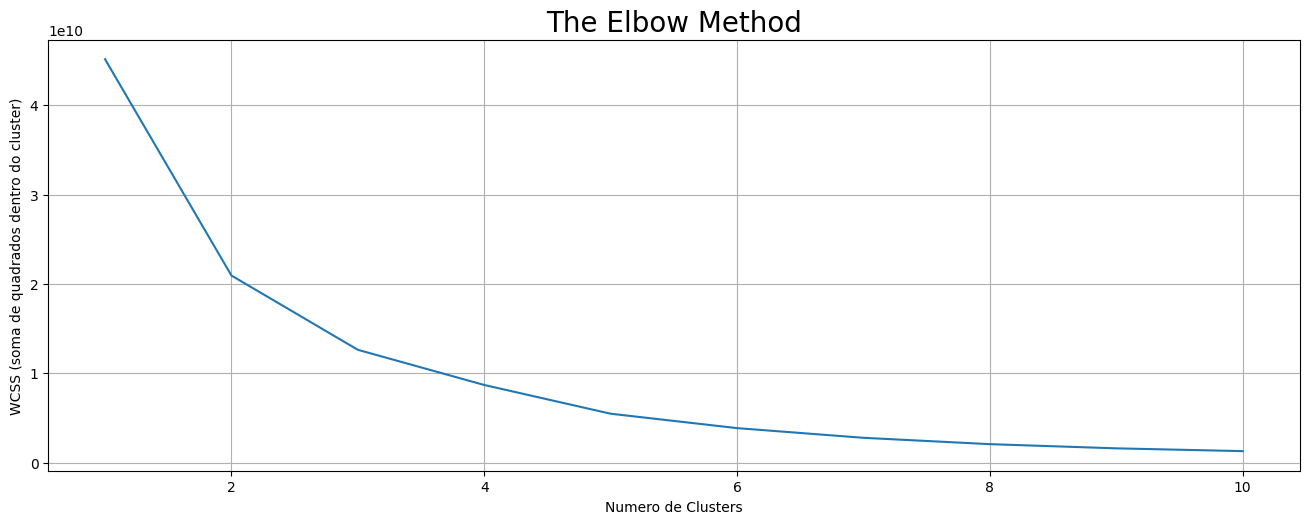

In [63]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

# desenhando o grafico    
plt.rcParams['figure.figsize'] = (13, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS (soma de quadrados dentro do cluster)')
plt.show()

De acordo com o gráfico the elbow method, a curvatura máxima está no segundo índice, ou seja, o número de agrupamentos ótimos para a product related duration e bounce rates é 2. Uma vez determinado o número de agrupamentos, aplicamos o método K Means e plote de clusters:

K-Means é um algoritmo de clusterização (ou agrupamento) disponível na biblioteca Scikit-Learn. É um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características, como por exemplo: lojas/centro logistico.

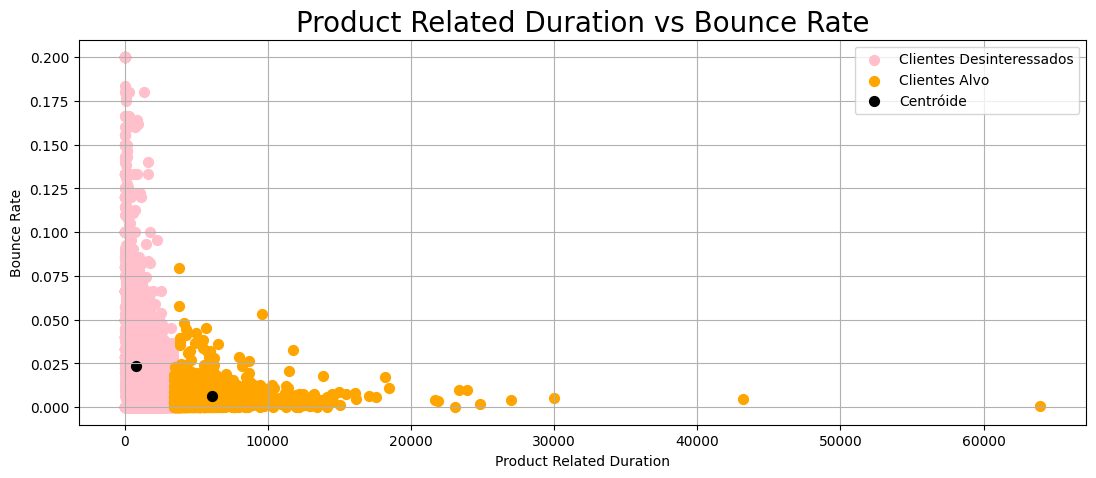

In [64]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink', label = 'Clientes Desinteressados')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'orange', label = 'Clientes Alvo')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'Centróide')

plt.title('Product Related Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rate')
plt.legend()
plt.show()


Índice rand ajustado:  0.08359442469281096


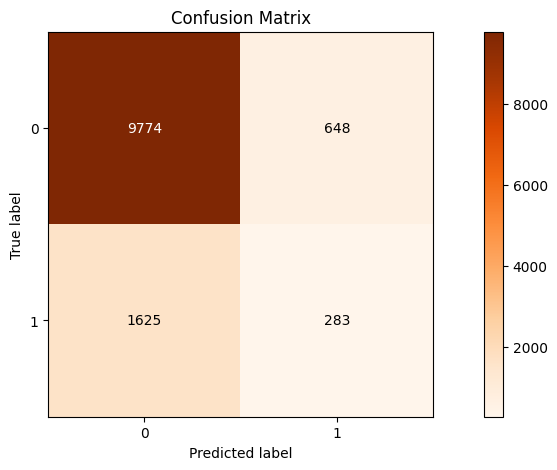

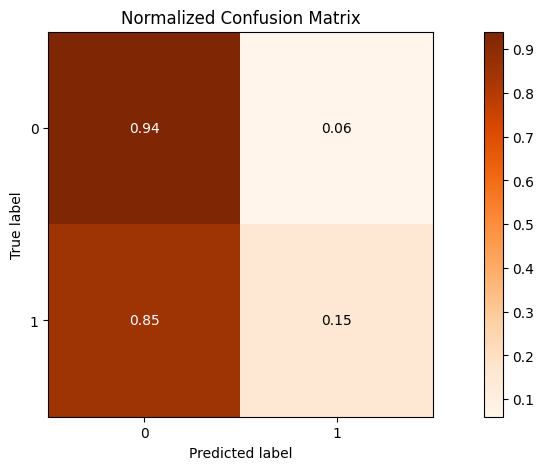

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# obter rótulo de resultado de agrupamento previsto
labels_pred = y_means

# imprima o índice rand ajustado, que mede a similaridade das duas atribuições
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("\nÍndice rand ajustado: ",score)

# imprimir matriz de confusão
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False, cmap='Oranges')
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True, cmap='Oranges')